In [1]:
from rkd.didactic import *
import numpy as np
import itertools 

In [5]:
d1,a2,d4,d6 = 300, 250, 280,50
rb = Robot((0,pi/2,d1,t1), (a2,0,0,t2), (0,pi/2,0,t3), (0,-pi/2,d4,t4), (0,pi/2,0,t5), (0,0,d6,t6))

In [6]:
T = rb.T

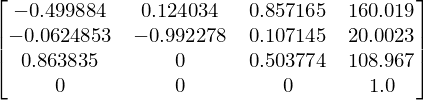

In [7]:
simplify( rb.Ts[0]*rb.Ts[1]*rb.Ts[2] ).subs({t1:rad(7.125), t2:rad(-49.83), t3:rad(170.08)}).evalf(6)

In [8]:
simplify( rb.Ts[0]*rb.Ts[1]*rb.Ts[2] ).subs({t1:T1, t2:T2, t3:T3}).evalf(6)

NameError: name 'T1' is not defined

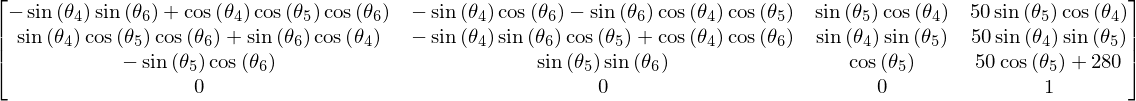

In [7]:
simplify( rb.Ts[3]*rb.Ts[4]*rb.Ts[5] )

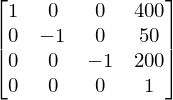

In [10]:
H = Matrix([[1,0,0,400], [0,-1,0,50], [0,0,-1,200], [0,0,0,1]])
H

In [11]:
xm,ym,zm = H[:3,3] - d6*H[:3,2]
T1 = atan2(ym, xm)
r = sqrt(xm**2 + ym**2)
s = sqrt(r**2 + (zm-d1)**2)
alpha = atan2(zm-d1, r)
K = (a2**2 + s**2 - d4**2)/(2*a2*s)
beta = atan2(sqrt(1-K**2), K)
T2 = alpha - beta
K1 = (s**2 - a2**2 - d4**2)/(2*a2*d4)
T3 = atan2(sqrt(1-K1**2), K1) + pi/2


# s = sqrt(xm**2 + ym**2 + (zm-d1)**2)
# alpha = atan2(d1-zm, r)
# K = (a2**2 + s**2 - d4**2)/(2*a2*s)
# beta = atan2(sqrt(1-K**2), K)
# T2 = beta - alpha
# K1 = (s**2 - a2**2 - d4**2)/(2*a2*d4)
# T3 = - atan2(sqrt(1-K1**2), K1) + pi/2

R30 = ( ( rb.Ts[0]*rb.Ts[1]*rb.Ts[2] ).subs({t1:T1, t2:T2, t3:T3}).evalf() )[:3,:3]
B = ( R30.inv()*H[:3,:3] )
# T5 = atan2(sqrt(1 - B[2,2]**2), B[2,2])
# T6 = atan2(B[2,1], -B[2,0])
# T4 = atan2(B[1,2], B[0,2])
T5 = atan2(-sqrt(1 - B[2,2]**2), B[2,2])
T6 = atan2(-B[2,1], B[2,0])
T4 = atan2(-B[1,2], -B[0,2])


for th in [T1,T2,T3,T4,T5,T6]:
    print(deg(th).evalf())

7.12501634890180
-49.8378437540761
170.087567270146
-6.21559563832006e-16
-120.249723516069
7.12501634890180


In [10]:
deg(alpha).evalf()

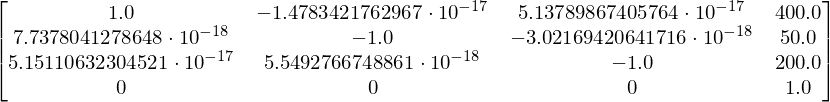

In [12]:
T.subs({t1:T1, t2:T2, t3:T3, t4:T4, t5:T5, t6:T6}).evalf()

In [259]:
# x = lambdify((t1,t2,t3,t4,t5,t6), T[0,3])
# y = lambdify((t1,t2,t3,t4,t5,t6), T[1,3])
# z = lambdify((t1,t2,t3,t4,t5,t6), T[2,3])

# _t1,_t2,_t3 = [0] , np.linspace(float(rad(-110)), float(rad(110)), 60), np.linspace(float(rad(-90)), float(rad(70)), 60)
# _t4 = _t5 = _t6 = [0]# np.linspace(-np.pi/2, np.pi/2, 10)

# points = itertools.product(_t1,_t2,_t3,_t4,_t5,_t6)
# points = list( zip(*list(points) ))
# T1,T2,T3 = np.array(points[0]), np.array(points[1]), np.array(points[2])
# T4,T5,T6 = np.array(points[3]), np.array(points[4]), np.array(points[5])
# plt.plot(x(T1,T2,T3,T4,T5,T6), z(T1,T2,T3,T4,T5,T6), "b.")
# plt.axis('square');

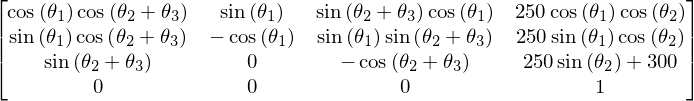

In [264]:
simplify( rb.Ts[0]*rb.Ts[1]*rb.Ts[2] )